In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import pyplot
import matplotlib as mpl

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

fashion-mnist_test.csv
fashion-mnist_train.csv



In [2]:
train_data = pd.read_csv('../input/fashion-mnist_train.csv')
test_data = pd.read_csv('../input/fashion-mnist_test.csv')

In [25]:
L_RATE = 0.001
BATCH_NUM = 100
EPOCH_NUM = 30
RANDOM_SEED = 1

CLASSES = {
    '0': 'T-shirt/top',
    '1': 'Trouser',
    '2': 'Pullover',
    '3': 'Dress',
    '4': 'Coat',
    '5': 'Sandal',
    '6': 'Shirt',
    '7': 'Sneaker',
    '8': 'Bag',
    '9': 'Ankle boot'
}

def ImageDisplay(list_data, label, one_hot=False):
    fig = pyplot.figure()
    axis = fig.add_subplot(1,1,1)
    list_data=np.reshape(list_data, (28,28))
    plot_img = axis.imshow(list_data, cmap=mpl.cm.Greys)
    plot_img.set_interpolation('none')
    if one_hot :
        ShowLabelName (label)
    else:
        print ("Label : "+str(CLASSES[str(label)]))
    
def ShowLabelName(label):
    print ("Label : "+str(CLASSES[str(label.argmax())]))

def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    
    C = tf.constant(C ,name='C')
    
    one_hot_matrix = tf.one_hot(labels, C, axis=1)
    
    sess = tf.Session()
    
    one_hot = sess.run(one_hot_matrix)#, feed_dic={})
    
    sess.close()
    
    return one_hot

In [4]:
X_train = train_data.loc[:,'pixel1':].values
y_train = train_data.loc[:,'label'].values
X_test = test_data.loc[:,'pixel1':].values
y_test = test_data.loc[:,'label'].values

y_train = one_hot_matrix(y_train, 10)
y_test = one_hot_matrix(y_test, 10)

X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

In [5]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(784, 60000) (784, 10000) (10, 60000) (10, 10000)


Label : Pullover


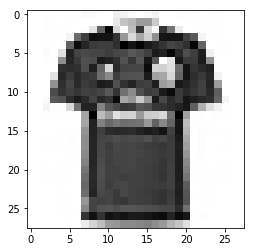

In [6]:
ImageDisplay(X_test.T[0].tolist(), y_train.T[0], one_hot=True)

In [7]:
layers = [ 784, 100, 100, 10 ]
m = X_train.shape[1] # number of sample

In [8]:

X = tf.placeholder("float", [layers[0], None])
Y = tf.placeholder("float", [layers[-1], None])

In [9]:
tf.set_random_seed(RANDOM_SEED)
    
W1 = tf.get_variable("W_L1", shape=[layers[1],layers[0]], initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable("b_L1", shape=[layers[1],1], initializer = tf.zeros_initializer())
W2 = tf.get_variable("W_L2", shape=[layers[2],layers[1]], initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("b_L2", shape=[layers[2],1], initializer = tf.zeros_initializer())
W3 = tf.get_variable("W_L3", shape=[layers[3],layers[2]], initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.get_variable("b_L3", shape=[layers[3],1], initializer = tf.zeros_initializer())

In [10]:
Z1 = tf.add(tf.matmul(W1, X), b1)
A1 = tf.nn.relu(Z1)
Z2 = tf.add(tf.matmul(W2, A1), b2)
A2 = tf.nn.relu(Z2)
Z3 = tf.add(tf.matmul(W3, A2), b3)

In [11]:
logits = tf.transpose(Z3)
labels = tf.transpose(Y)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.AdamOptimizer(learning_rate = L_RATE).minimize(cost)

In [15]:
# Calculate the correct predictions
correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

# Calculate accuracy on the test set
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

Epoch 0: Cost - 2.6156 Train Acc - 76.74 Test Acc - 76.38
Epoch 1: Cost - 0.6949 Train Acc - 80.21 Test Acc - 79.68
Epoch 2: Cost - 0.5716 Train Acc - 80.90 Test Acc - 80.27
Epoch 3: Cost - 0.5204 Train Acc - 82.18 Test Acc - 81.14
Epoch 4: Cost - 0.4761 Train Acc - 83.62 Test Acc - 82.55
Epoch 5: Cost - 0.4559 Train Acc - 83.79 Test Acc - 82.73
Epoch 6: Cost - 0.4364 Train Acc - 83.90 Test Acc - 82.91
Epoch 7: Cost - 0.4337 Train Acc - 84.05 Test Acc - 83.06
Epoch 8: Cost - 0.4231 Train Acc - 83.42 Test Acc - 82.46
Epoch 9: Cost - 0.4234 Train Acc - 84.32 Test Acc - 83.60
Epoch 10: Cost - 0.4106 Train Acc - 85.69 Test Acc - 84.59
Epoch 11: Cost - 0.3857 Train Acc - 83.58 Test Acc - 82.83
Epoch 12: Cost - 0.3832 Train Acc - 86.66 Test Acc - 85.33
Epoch 13: Cost - 0.3761 Train Acc - 86.44 Test Acc - 84.92
Epoch 14: Cost - 0.3692 Train Acc - 86.75 Test Acc - 84.98
Epoch 15: Cost - 0.3620 Train Acc - 86.73 Test Acc - 85.19
Epoch 16: Cost - 0.3551 Train Acc - 86.95 Test Acc - 85.54
Epoch 1

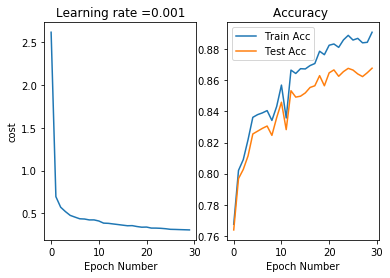

In [31]:
costs = []
train_acc = []
test_acc= []
init = tf.global_variables_initializer()
# Start the session to compute the tensorflow graph
with tf.Session() as sess:

    # Run the initialization
    sess.run(init)

    # Do the training loop
    for epoch in range(EPOCH_NUM):

        epoch_cost = 0.                       # Defines a cost related to an epoch
        num_minibatches = int(m / BATCH_NUM) # number of minibatches of size minibatch_size in the train set
        #seed = seed + 1
        #minibatches = random_mini_batches(X_train, y_train, batch_size, seed)

      #  for minibatch in minibatches:
        for step in range(num_minibatches):

            # Select a minibatch
            minibatch_X = X_train[:,step*BATCH_NUM:(step+1)*BATCH_NUM]
            minibatch_Y = y_train[:,step*BATCH_NUM:(step+1)*BATCH_NUM]
#                (minibatch_X, minibatch_Y) = minibatch

            # IMPORTANT: The line that runs the graph on a minibatch.
            # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
            _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})

            epoch_cost += minibatch_cost / num_minibatches

        # Print the cost every epoch
       # if epoch % 100 == 0:
        epoch_train_acc = accuracy.eval({X: X_train, Y: y_train})
        epoch_test_acc = accuracy.eval({X: X_test, Y: y_test})
        
        
        #epoch_ac
        print ('Epoch %i: Cost - %0.4f Train Acc - %0.2f Test Acc - %0.2f' 
               % (epoch, epoch_cost, 100*epoch_train_acc, 100*epoch_test_acc) )
       # if epoch % 5 == 0:
        costs.append(epoch_cost)
        train_acc.append(epoch_train_acc)
        test_acc.append(epoch_test_acc)
        
    y_predict = sess.run(logits, feed_dict={X: X_test})

# plot the cost
fig, ax = plt.subplots(ncols=2)
ax[0].plot(np.squeeze(costs))
ax[0].set_ylabel('cost')
ax[0].set_xlabel('Epoch Number')
ax[0].set_title("Learning rate =" + str(L_RATE))

ax[1].plot(train_acc, label="Train Acc")
ax[1].plot(test_acc, label="Test Acc")
ax[1].set_xlabel('Epoch Number')
ax[1].set_title("Accuracy ")
ax[1].legend()

plt.show()

#print ("Train Accuracy:", accuracy.eval({X: X_train, Y: y_train}))
#print ("Test Accuracy:", accuracy.eval({X: X_test, Y: y_test}))
